In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata

In [2]:
df = pdata.SP500_monthly()
df.head()

,Date,Price
0,"Mar 1, 2018",2677.67
1,"Feb 1, 2018",2816.45
2,"Jan 1, 2018",2683.73
3,"Dec 1, 2017",2645.10
4,"Nov 1, 2017",2579.36


In [3]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [4]:
df.columns = ['ds', 'y']

In [44]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)
forecast = m.predict(future)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [45]:
forecast = m.predict(future)

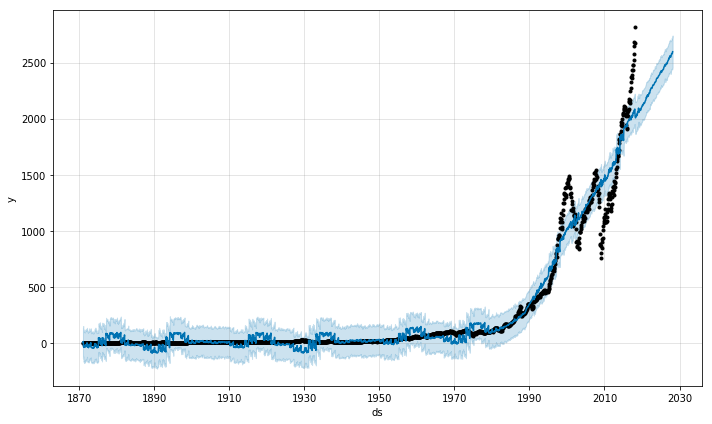

In [46]:
m.plot(forecast)

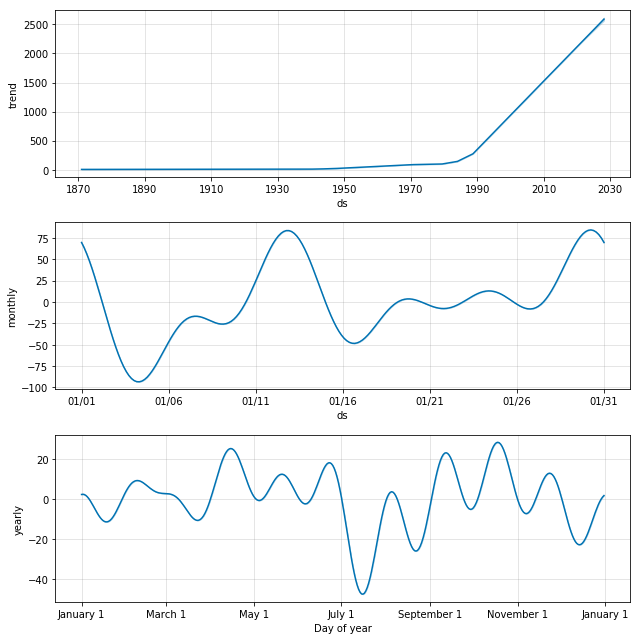

In [47]:
m.plot_components(forecast, uncertainty=True, plot_cap=True)

In [31]:
help(m.add_seasonality)

Help on method add_seasonality in module fbprophet.forecaster:

add_seasonality(name, period, fourier_order, prior_scale=None) method of fbprophet.forecaster.Prophet instance
    Add a seasonal component with specified period, number of Fourier
    components, and prior scale.
    
    Increasing the number of Fourier components allows the seasonality to
    change more quickly (at risk of overfitting). Default values for yearly
    and weekly seasonalities are 10 and 3 respectively.
    
    Increasing prior scale will allow this seasonality component more
    flexibility, decreasing will dampen it. If not provided, will use the
    seasonality_prior_scale provided on Prophet initialization (defaults
    to 10).
    
    Parameters
    ----------
    name: string name of the seasonality component.
    period: float number of days in one period.
    fourier_order: int number of Fourier components to use.
    prior_scale: float prior scale for this component.
    
    Returns
    ------